In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from helper_functions.grape_functions import *
from main_grape.Grape_original import Grape
from helper_functions.qutip_open_verification import *
from helper_functions.qutip_mmt_verification import *

%pylab inline

print parentdir
from IPython import display


Populating the interactive namespace from numpy and matplotlib
/home/mohamed/OQOC/OQOC_Github


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Defining time scales
total_time = 50
steps = 500
state_transfer = True
RWA = True
RFT = True

#Defining H0
qubit_state_num = 2

fq= 4.6/(2*np.pi)
kappa = 0.05
gamma = 0.001
g = 0.05

mode_state_num = 50
#g = 2.*np.pi*0.1 #GHz
mode_freq1 = 5.0/(2*np.pi) #GHz
state_num = qubit_state_num * mode_state_num

wc = 2*np.pi*mode_freq1
wa = 2*np.pi*fq

a   = np.kron(np.diag(np.sqrt(np.arange(1,mode_state_num)),1),np.identity(qubit_state_num))
adag   = np.kron(np.diag(np.sqrt(np.arange(1,mode_state_num)),-1),np.identity(qubit_state_num))
sm = np.kron(np.identity(mode_state_num),np.diag(np.sqrt(np.arange(1,qubit_state_num)),1))
smdag = np.kron(np.identity(mode_state_num),np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
if RFT:
    if RWA: 
        H0 = (wa -wc) * np.dot(smdag,sm) + g * (np.dot(adag,sm) + np.dot(a,smdag))
    else:
        H0 =  (wa-wc) * np.dot(smdag,sm) +  g * np.dot((adag + a),(sm + smdag))
    
else:
    if RWA:
         H0 = wc * np.dot(adag,a) + wa * np.dot(smdag,sm) + g * (np.dot(adag,sm) + np.dot(a,smdag))
    else:
         H0 = wc * np.dot(adag,a) + wa * np.dot(smdag,sm) +  g * np.dot((adag + a),(sm + smdag))
#Defining Forbidden sates


#Defining Concerned states (starting states)
psi0=[0,1]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2]
states_draw_names = ['g0','e0','g1']




#Defining U (Target)
if state_transfer:
    U =[]
    U1 = np.zeros(state_num,dtype=complex)
    U1[1]=1
    U1[0]=0
    U.append(U1)
    U2 = np.zeros(state_num,dtype=complex)
    U2[0]=1
    U.append(U2)
    
else:
    Ut_c = la.expm((0-1j)*total_time*H0)
    Ct_c = Ut_c.copy()
    Ct_c[1,0] = 1
    Ct_c[0,1] = 1
    Ct_c[0,0] = 0
    Ct_c[1,1] = 0
    U = Ct_c

print np.shape(U)
#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num)
U0= q_identity

#Defining control Hs
IX = a + adag
IY = (0+1j)* (a-adag)
Hops = [IX]
ops_max_amp = [2]
Hnames =['HI']

#Defining convergence parameters
max_iterations = 500
decay = max_iterations/2
convergence = {'rate':0.005, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-10,'learning_rate_decay':decay}
reg_coeffs = {'envelope' : 0,  'dwdt':0,'d2wdt2':0}
#, 'forbidden':100 , 'states_forbidden_list': [3]
#reg_coeffs = { 'speed_up':100}
#reg_coeffs = {'envelope' : 0,  'dwdt':0,'d2wdt2':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

    #Defining initial pulses

print len(U)


(2, 100)
2


In [3]:
w_c, v_c, dressed_id = get_dressed_info(H0)
print w_c
print dressed_id
g0 = v_c[:,get_state_index(0,dressed_id)]
print g0
print v_c[:,get_state_index(1,dressed_id)]

[ 0.20311289+0.j -0.60311289+0.j  0.00615528+0.j -0.40615528+0.j
  0.01213203+0.j -0.41213203+0.j  0.01794495+0.j -0.41794495+0.j
  0.02360680+0.j -0.42360680+0.j  0.02912878+0.j -0.42912878+0.j
  0.03452079+0.j -0.43452079+0.j  0.03979158+0.j -0.43979158+0.j
  0.04494897+0.j -0.44494897+0.j  0.05000000+0.j -0.45000000+0.j
  0.05495098+0.j -0.45495098+0.j  0.05980762+0.j -0.45980762+0.j
  0.06457513+0.j -0.46457513+0.j  0.06925824+0.j -0.46925824+0.j
  0.07386128+0.j -0.47386128+0.j  0.07838822+0.j -0.47838822+0.j
  0.08284271+0.j -0.48284271+0.j  0.08722813+0.j -0.48722813+0.j
 -0.49154759+0.j  0.09154759+0.j  0.09580399+0.j -0.49580399+0.j
  0.10000000+0.j -0.50000000+0.j  0.10413813+0.j -0.50413813+0.j
 -0.50822070+0.j  0.10822070+0.j  0.11224990+0.j -0.51224990+0.j
 -0.51622777+0.j  0.11622777+0.j  0.12015621+0.j -0.52015621+0.j
  0.12403703+0.j -0.52403703+0.j  0.12787193+0.j -0.52787193+0.j
  0.13166248+0.j -0.53166248+0.j  0.13541020+0.j -0.53541020+0.j
  0.13911650+0.j -0.53911

In [4]:

c_ops=[]
c_ops.append(np.sqrt(gamma)*sm)
c_ops.append(np.sqrt(kappa)*a)
#c_ops.append(ef)

#print c_ops
print gamma


0.001


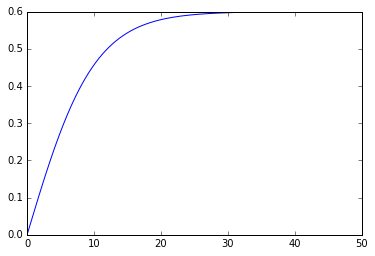

In [5]:
import h5py

with h5py.File('/home/mohamed/Data/00878_Qubit_Pi_open.h5','r') as hf:
    u0 = np.array(hf.get('uks'))[-1]

u0 = None

u0 = []
signal = 0.6*np.tanh(np.linspace(0,total_time, steps)/10)
u0.append(signal)
#u0.append(signal)
#u0.append(2*np.ones(steps))

u0 = None
plot (np.linspace(0,total_time, steps), signal)

TypeError: 'NoneType' object is not iterable

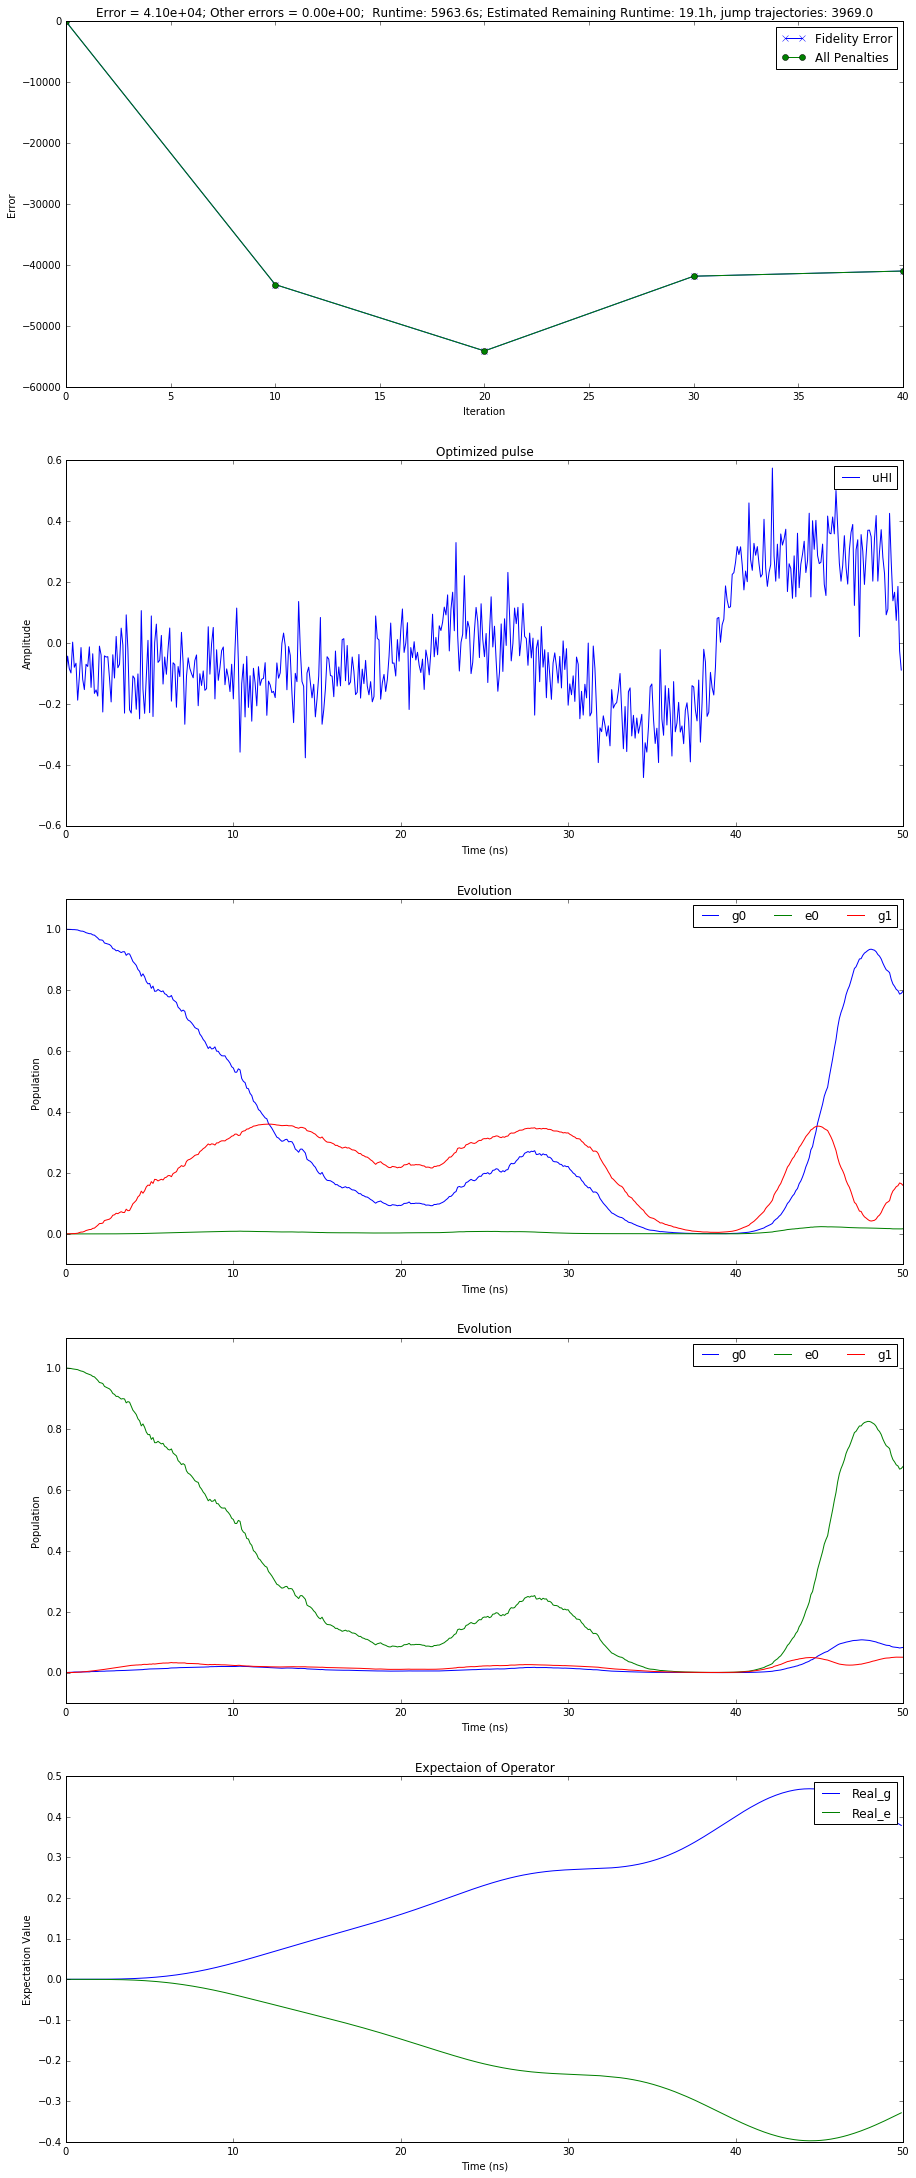

In [6]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True

      
uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],  
                    
                    show_plots = True, c_ops = c_ops, initial_guess = u0, use_gpu = True,
       unitary_error = 1e-4,  maxA=ops_max_amp, state_transfer = state_transfer, method ='Adam', expect_op = a + adag,
                    reg_coeffs=reg_coeffs, file_name='JC', trajectories = 2000, do_all_traj = False,
                    data_path = '/home/mohamed/Data')

In [ ]:
file_name = '/home/mohamed/Data/00316_JC.h5'
mmt_qutip_verification(file_name, np.dot(adag,a) )
mmt_qutip_verification(file_name, adag+a )
mmt_qutip_verification(file_name, (0+1j)* (a-adag) )